## Calculate Statistics for $\mathcal{C}_V$ vs $\mathcal{C}_V^{exact}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from operator import xor
from bonds import Bonds
from block_configs import *
from count_bonds import *
from specific_heat import SpecificHeat
from utils import *
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText
import matplotlib.offsetbox as offsetbox
colors = ['#2A9Df8', '#FF920B', '#65e41d', '#be67ff', '#EE2324']
markeredgecolors = ['#0256a3', '#ed4c18',  '#00B000', '#6633cc',  '#Db1f0e']

#colors = ['#5A9BD4', '#Faa75b', '#7AC36A', '#9D67Ab', '#F15A5F', '#737373',
#         '#D77FB4', '#CE7059']
#markeredgecolors = ['#185AA9', '#F47D23', '#008c48', '#662c91', '#Ef2E30',
#                    '#010202', '#B43894', '#A21E20']



%matplotlib notebook
import matplotlib as mpl
label_size = 14
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

In [2]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [3]:
exact_data = pd.read_csv('../data/Cvexact32.dat', header=None, 
                         delim_whitespace=True, engine='c').values

In [4]:
temps_exact = exact_data[:, 0]
Cv_exact = exact_data[:, 1]

In [5]:
specific_heat32 = SpecificHeat(32, num_blocks=9)

In [6]:
spec_heat32_temps = np.array(specific_heat32._spec_heat_temps)
spec_heat32_vals = np.array([specific_heat32._spec_heat, 
                             specific_heat32._spec_heat_err]).T
#spec_heat32_err = np.array(specific_heat32._spec_heat_err)
spec_heat32_temps.shape, spec_heat32_vals.shape#, spec_heat32_err.shape

((336,), (336, 2))

In [7]:
cv32_dict = dict(zip([str(i).rstrip('0') for i in spec_heat32_temps], 
                     spec_heat32_vals))

In [8]:
cv_exact = dict(zip([str(i).rstrip('0') for i in temps_exact],
                    Cv_exact))

In [9]:
cv32_ = {}
cv_exact_ = {}
temps = []
cv32_vals = []
cv32_errs = []
cv_exact_vals = []
for key, val in cv_exact.items():
    if key in list(cv32_dict.keys()):
        temps.append(float(key))
        cv32_vals.append(cv32_dict[key][0])
        cv32_errs.append(cv32_dict[key][1])
        cv32_[key] = cv32_dict[key]
        cv_exact_vals.append(val)
        cv_exact_[key] = val
cv32_vals = np.array(cv32_vals)
cv32_errs = np.array(cv32_errs)
cv_exact_vals = np.array(cv_exact_vals)

In [26]:
cv32_vals

array([ 0.02237908,  0.02825631,  0.03130249,  0.03257882,  0.03554734,
        0.03579927,  0.03855955,  0.04018347,  0.03828231,  0.04530705,
        0.054041  ,  0.05238691,  0.04622364,  0.05122093,  0.06077346,
        0.05732837,  0.055843  ,  0.06943333,  0.0751011 ,  0.06923294,
        0.06883123,  0.07262057,  0.07732292,  0.08359878,  0.09304616,
        0.10020215,  0.09432126,  0.09153379,  0.09875502,  0.11048672,
        0.11178332,  0.11842743,  0.12320627,  0.12686604,  0.12542444,
        0.11753626,  0.12407239,  0.14232058,  0.14479812,  0.1481895 ,
        0.15772348,  0.16075873,  0.17069015,  0.17823778,  0.18037382,
        0.17996312,  0.17466428,  0.19008307,  0.20969521,  0.21292849,
        0.202624  ,  0.20941718,  0.22450071,  0.23714544,  0.24217685,
        0.23960322,  0.24189448,  0.25005041,  0.26157061,  0.27520656,
        0.28057688,  0.28391897,  0.29149077,  0.30047169,  0.31529832,
        0.32152728,  0.32132713,  0.33628021,  0.35541464,  0.35

In [11]:
variance = np.sum((cv32_vals - cv_exact_vals)**2/len(temps))

In [12]:
variance

0.0011332736382254176

In [13]:
diff_arr = []
diff2_arr = []
diff2_err = []
err_arr = []
for idx, val in enumerate(cv32_vals):
    diff = val - cv_exact_vals[idx]
    diff_arr.append(diff)
    diff2 = diff**2
    err = cv32_errs[idx]
    err_arr.append(err)
    err2 = err**2
    diff2_arr.append(diff2)
    diff2_err.append(diff2/err)
    

In [14]:
np.sum(np.array(diff_arr)**2)

0.28105186227990353

In [38]:
np.sum(diff2_err)/len(diff2_err)

10.566896511068926

In [35]:
diff_arr

[-0.0010004886043335701,
 0.0033595389368121439,
 0.0048238784508851766,
 0.0044526135869157428,
 0.0057067131698646766,
 0.0041763239170897887,
 0.0050853631221619636,
 0.0047880910143394753,
 0.000894808912866904,
 0.0058554963130430376,
 0.012452520486351842,
 0.0085876849337714334,
 0.00013891205052660172,
 0.0027750448206637843,
 0.0098898576344085692,
 0.0039296020602904297,
 -0.00014926189379688842,
 0.010768369152047576,
 0.013683385283424089,
 0.0049815459128779299,
 0.0016643757094267631,
 0.0024556204235595819,
 0.0040763954579601941,
 0.0071863398092589653,
 0.013382608067746174,
 0.017201411694976909,
 0.0078964163715839059,
 0.0015970238704443723,
 0.0052176287154776374,
 0.013259103014627696,
 0.010774943974584936,
 0.013546840249017519,
 0.014361056112127082,
 0.013962814900252266,
 0.0083688160782946219,
 -0.0037671752103481254,
 -0.0015753235734375509,
 0.012231049070401623,
 0.010168107010621763,
 0.0089191921356479853,
 0.013711878626033319,
 0.011903598013418726,
 

In [34]:
err_arr

[0.00012182370744021261,
 6.771356502448947e-05,
 8.1622907470850267e-05,
 7.0833355827736556e-05,
 5.2483462631606254e-05,
 0.00012279771889868742,
 7.5869238668588163e-05,
 6.9403166991591168e-05,
 5.5306110198035581e-05,
 7.8382527614490369e-05,
 5.9206516180666063e-05,
 0.00010370646487181938,
 7.0446112474938823e-05,
 3.8763178380595039e-05,
 7.4570999181620593e-05,
 0.00011906976129729981,
 9.6878977492503217e-05,
 6.8775962516921585e-05,
 0.00010637085095689653,
 5.4088492773517454e-05,
 3.5094387405576416e-05,
 6.3869744517534437e-05,
 3.9063686257444001e-05,
 7.9601989860551611e-05,
 8.6332817607053132e-05,
 0.00012202242647947767,
 5.5510373656718246e-05,
 6.7270833896265324e-05,
 9.2904183889322718e-05,
 9.2858432886075019e-05,
 3.9530842974624027e-05,
 7.9733281684261993e-05,
 9.0359715355917277e-05,
 0.0001040221969906566,
 8.3191790049720656e-05,
 0.00019066531927770331,
 7.1591554640458696e-05,
 5.5126488054628619e-05,
 8.5475029498633426e-05,
 7.6352069534317706e-05,
 0

In [29]:
diff2_arr

[67.446694216066419,
 2461.5462435060508,
 3492.7587646705256,
 3951.4307866793279,
 11822.984736647299,
 1156.66541972043,
 4492.7524176858578,
 4759.55354599159,
 261.76668509232644,
 5580.7028081869839,
 44235.965987503085,
 6857.1009704860953,
 3.8883538556879933,
 5125.0870274761155,
 17588.959759370271,
 1089.1662607615742,
 2.3737709039946675,
 24514.69624666229,
 16547.860229839967,
 8482.3954530689989,
 2249.1965357410932,
 1478.1963161901672,
 10889.45567774118,
 8150.1884355677457,
 24028.667516871064,
 19872.333491294645,
 20235.399321896519,
 563.59767450775541,
 3154.102465970956,
 20388.514738622303,
 74294.709733558047,
 28866.673512871883,
 25259.401136710861,
 18017.474560722072,
 10119.687664264948,
 390.38060172853045,
 484.19015757172662,
 49227.384920852484,
 14151.474645319353,
 13646.12712263812,
 16927.033839598036,
 25528.135751542206,
 29381.757209836185,
 40690.665324272166,
 21008.489461535886,
 5128.4266881106414,
 0.020611406517855885,
 18419.852800923796

In [15]:
#variance = np.sum((Cv_32_ - Cv_exact_)**2)/len(Cv_exact_)
chisq = np.sum((((cv32_vals - cv_exact_vals)**2/variance)))
nu = len(temps) - 1
red_chisq = chisq / nu
print("chisq: {}\t nu: {}\t chisq/nu: {}".format(chisq, nu, red_chisq))

chisq: 248.0	 nu: 247	 chisq/nu: 1.0040485829959513


In [22]:
red_chisq*variance

0.059294024738053147

In [182]:
diff_arr_ = np.sqrt(np.abs((cv32_vals - cv_exact_vals)**2/variance))

In [183]:
diff_arr_

array([  2.97197227e-02,   9.97958050e-02,   1.43294316e-01,
         1.32265815e-01,   1.69519105e-01,   1.24058573e-01,
         1.51061772e-01,   1.42231242e-01,   2.65804854e-02,
         1.73938740e-01,   3.69904719e-01,   2.55098973e-01,
         4.12641144e-03,   8.24332853e-02,   2.93780284e-01,
         1.16729649e-01,   4.43385569e-03,   3.19876652e-01,
         4.06467814e-01,   1.47977861e-01,   4.94406277e-02,
         7.29447170e-02,   1.21090177e-01,   2.13471723e-01,
         3.97533165e-01,   5.10971523e-01,   2.34564696e-01,
         4.74399272e-02,   1.54990749e-01,   3.93864421e-01,
         3.20071959e-01,   4.02411716e-01,   4.26598168e-01,
         4.14768330e-01,   2.48597427e-01,   1.11904726e-01,
         4.67953154e-02,   3.63325864e-01,   3.02045740e-01,
         2.64946463e-01,   4.07314215e-01,   3.53598862e-01,
         5.01661118e-01,   5.75798305e-01,   4.86028786e-01,
         3.17410448e-01,   3.48454897e-04,   2.95420936e-01,
         7.11723380e-01,

In [184]:
diff_arr = np.abs((Cv_32_ - Cv_exact_)/Cv_exact_)
#chi_sq = np.sqrt(np.sum(diff_arr))

ValueError: operands could not be broadcast together with shapes (124,) (249,) 

In [ ]:
bonds = [(i, j) for i in range(8)]

<IPython.core.display.Javascript object>


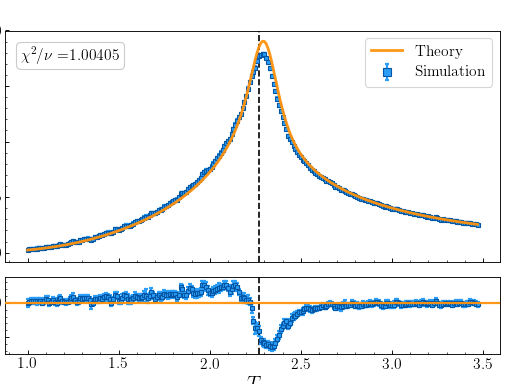

<Container object of 3 artists>

[None, None, None, None]

<Container object of 3 artists>

Text(45.3464,0.5,'$C_{V} / V$')

Text(0.5,25.164,'$T$')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
fit_string = (
    r"$\chi^2/\nu = ${:.5f}".format(red_chisq)
)

fig, ax = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

Tc = 2./np.log(1+np.sqrt(2))
ax[0].axvline(x=Tc, linestyle='--', color='k')#, label='$T = T_c$')
ax[1].axvline(x=Tc, linestyle='--', color='k')#, label='$T = T_c$')
ax[0].plot(temps, cv_exact_vals,
           marker='',
           color=colors[1],
           markeredgecolor=markeredgecolors[1],
           #markeredgecolor='#ed4c18',
           markersize=7., 
           zorder=20,
           ls='-',
           alpha=0.95,
           lw=2.5,
           label=r"Theory")
ax[0].errorbar(temps, cv32_vals,
               yerr=cv32_errs**0.5,
               marker='s', 
               color=colors[0],
               markeredgecolor=markeredgecolors[0],
               #markeredgecolor='#1f1b93',
               markersize=4., 
               #color='C0',
               elinewidth=2.,
               capsize=2., capthick=2.,
               ls='',
               zorder=10,
               label=r"Simulation")
#ax.fill_between(t_32, Cv_32_-diff_arr, Cv_32_+diff_arr,
#                color='C0', alpha=0.5, zorder=10)
ob = offsetbox.AnchoredText(fit_string, loc=2, pad=0.05, borderpad=1.,
                            prop=dict(size=14))
ob.patch.set(boxstyle='round', edgecolor='#bebebe', facecolor='w',
             alpha=0.8)
ax[0].add_artist(ob)

ax[1].errorbar(temps, (cv32_vals - cv_exact_vals),
               yerr=cv32_errs**0.5,
               marker='s', 
               color=colors[0],
               markeredgecolor=markeredgecolors[0],
               #markeredgecolor='#1f1b93',
               markersize=3., 
               #color='C0',
               elinewidth=2.,
               capsize=2., capthick=2.,
               #alpha=0.7,
               ls='',
               label=r"$C_V^{simulated} - C_V^{exact}$")

ax[1].axhline(y=0, linestyle='-', color=colors[1], lw=2., zorder=10, alpha=0.95)
fig.tight_layout()
ax[0].legend(loc='best', fontsize=14, markerscale=2.)
#ax[1].legend(loc='best', fontsize=10, markerscale=1.6)
#plt.legend(loc='best', fontsize=14, markerscale=1.6)
ax[0].set_ylabel(r"$C_{V} / V$", fontsize=18)
#plt.suptitle(r"$C_v$ vs. $T$", fontsize=18, horizontalalignment='center')
plt.subplots_adjust(top=0.92, left=0.01, hspace=0.1)
#ax[0].xlabel(r"$T$", fontsize=16)
ax[1].set_xlabel(r"$T$", fontsize=18)
plt.setp(ax[0].get_xticklabels(), visible=False)
#ax[1].set_title(r"$C_{V}^{simulated} - C_V^{exact}$ vs. $T$", fontsize=18)
#ax[1].set_title(r"Residuals vs. $T$", fontsize=18)
#ax[0].grid()
#ax[1].grid()
plt.savefig('../plots/kauffman_Cv_statistics.png',
            dpi=400, bbox_inches='tight')
plt.show()

In [144]:
help(ax)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [116]:
chi_sq/len(diff_arr)
ax.

0.010737527759777753

In [117]:
len(diff_arr)

249